In [1]:
#import knv as kNV
import matplotlib.pyplot as plt
import numpy as np
import qutip as qu

In [2]:
import sys
import os
sys.path.append(os.path.abspath(r'../GIT/parament/src/python/pyparament'))
os.environ['PARAMENT_LIB_DIR'] = os.path.abspath(r'../GIT/parament/build')
import parament

In [3]:
f0 = 490e6 # 490 MHz
H0 = (2*np.pi*(f0)) * qu.sigmaz()/2

In [26]:
f1 = 100e6*2
H1 = (2*np.pi*f1) * qu.sigmax()/2

In [27]:
psi0 = qu.basis(2,0)

In [28]:
runner = parament.Parament(precision='fp64')

In [29]:
runner.set_hamiltonian(H0,H1,use_magnus=True,quadrature_mode='simpson')

In [30]:
def gen_pulse(f0,w,dt):
    t = np.arange(0,100e-9,dt)
    carr = np.sin(2*np.pi*f0*t)
    b = 50e-9
    c = w/(2*np.sqrt(2*np.log(2)))
    amp = np.exp(-(t-b)**2/(2*c**2))
    #plt.plot(t*1e9,amp*carr)
    #plt.show()
    return (amp*carr)

In [31]:
xp = []
yp = []
zp = []

stop = 10e-9

dur = np.linspace(0,stop,101)[2:]
for i in (range(len(dur))):
    ds = 2e-12
    t = np.arange(0,dur[i],ds)
    carr = np.sin(2*np.pi*f0*t)
    #carr = gen_pulse(f0,dur[i],ds)
    #print(len(carr))
    
    op2 = runner.equiprop(ds,carr[:-1])
    
    rho = op2*psi0
    
    phase = 2*np.pi*f0*dur[i]*0
    x_rot = np.cos(phase)*qu.sigmax() + np.sin(phase)*qu.sigmay()
    meas_x = qu.expect(x_rot,rho)
    xp.append(meas_x)
    
    y_rot = np.sin(phase)*qu.sigmax() + np.cos(phase)*qu.sigmay()
    meas_y = qu.expect(y_rot,rho)
    yp.append(meas_y)
    
    meas_z = qu.expect(qu.sigmaz(),rho)
    zp.append(meas_z)
    
    
    #diff = op2 - op
    #diff_store.append(np.sum(np.abs(diff)))

In [32]:
xp = np.array(xp)
yp = np.array(yp)
zp = np.array(zp)


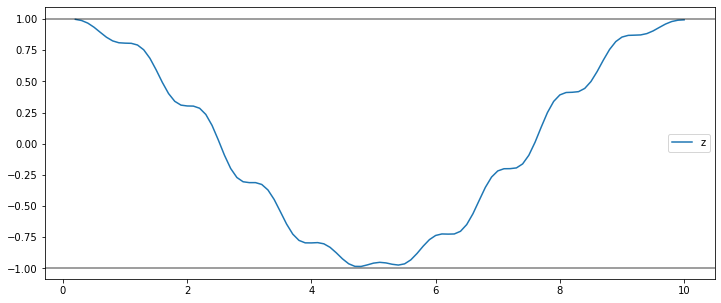

In [33]:
%matplotlib inline
plt.figure(figsize=(12,5))
#plt.plot(dur*1e9,xp,label='x')
#plt.plot(dur*1e9,yp,label='y')
plt.plot(dur*1e9,zp,label='z')
plt.legend()
plt.axhline(1,c='k',alpha=0.5)
plt.axhline(-1,c='k',alpha=0.5)


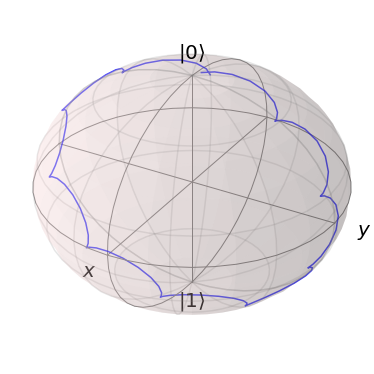

In [34]:
b = qu.Bloch()
pnts = [yp, xp, zp]
b.add_points(pnts,'l')
b.render()